In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()# define color
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('PJME_hourly.csv')
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)
df.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


<AxesSubplot:title={'center':'PJME Energy Use In MW'}, xlabel='Datetime'>

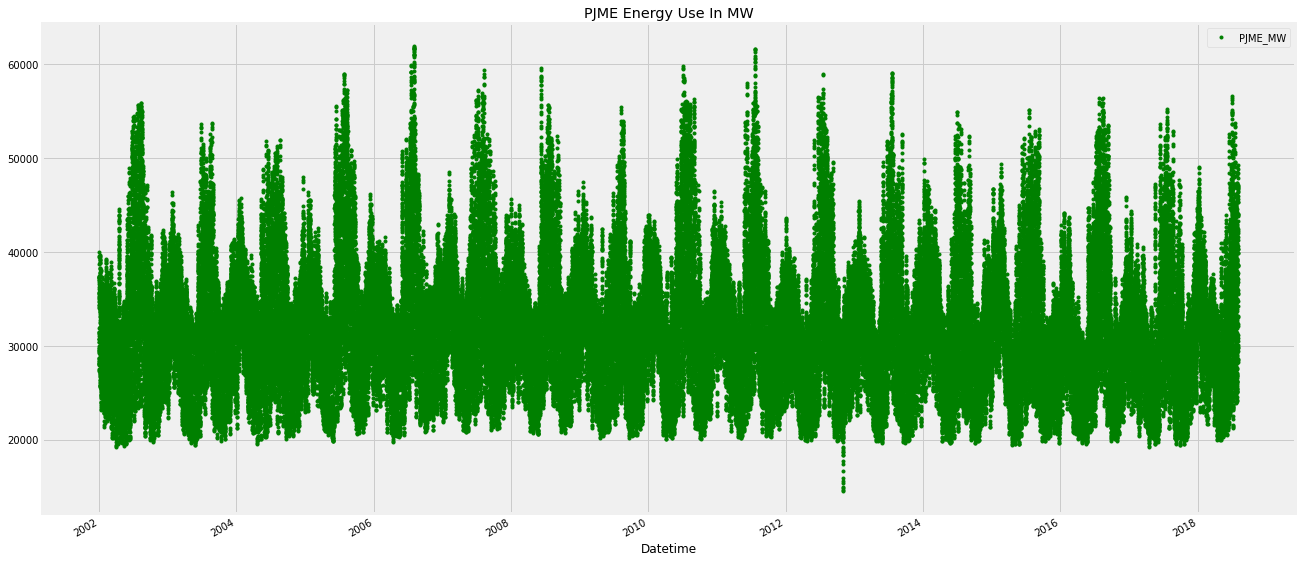

In [4]:
df.plot(style='.', 
        figsize=(20,10),
        color='green', 
        title='PJME Energy Use In MW')

#  Train/Test split

In [5]:
Train_df=df.loc[df.index<'2015-01-01']
Test_df=df.loc[df.index>='2015-01-01']


In [6]:
Train_df=Train_df.sort_index(ascending=True)
Test_df=Test_df.sort_index(ascending=True)

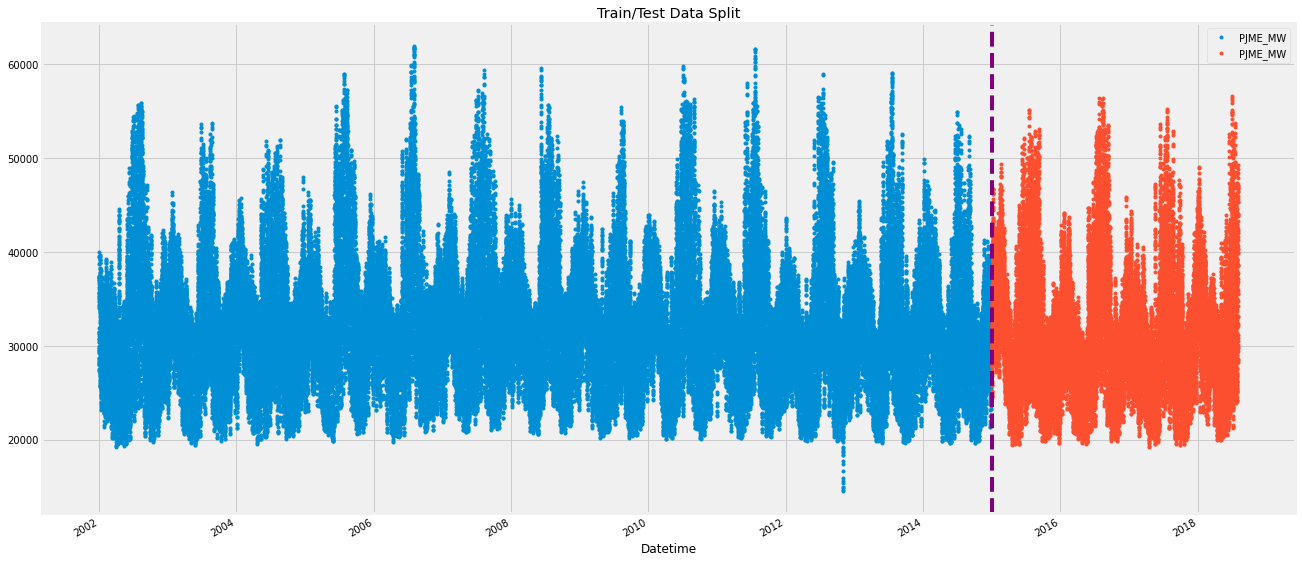

In [7]:
fig, ax=plt.subplots(figsize=(20,10))
Train_df.plot(ax=ax,style='.',label='Training Set')
Test_df.plot(ax=ax,style='.',label='Testing Set',title='Train/Test Data Split')
ax.axvline('2015-01-01',color='purple',ls='--')
plt.show()

<AxesSubplot:title={'center':'Week of Data'}, xlabel='Datetime'>

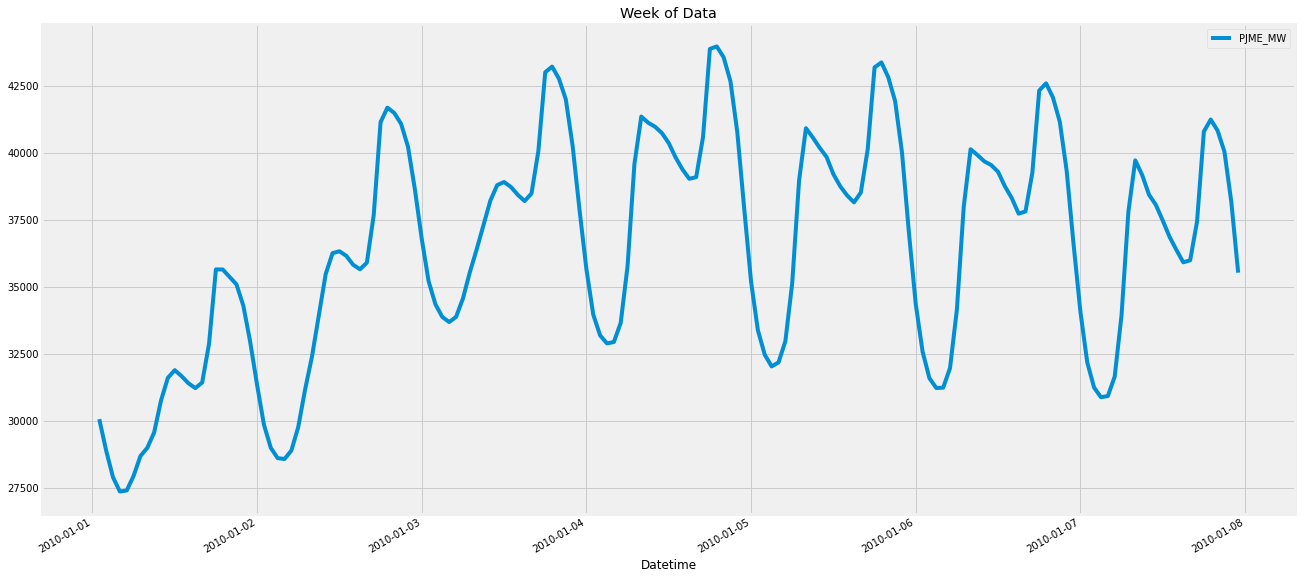

In [8]:
df.loc[(df.index>'2010-01-01') & (df.index<'2010-01-08')].plot(figsize=(20,10),label='PJME_MV', title='Week of Data')

# Feature creation

In [9]:
def feature_creation(df):
    df['Hour']=df.index.hour
    df['DayofWeek']=df.index.day_of_week
    df['Quarter']=df.index.quarter
    df['Month']=df.index.month
    df['Year']=df.index.year
    df['DayofYear']=df.index.day_of_year
    return df

df=feature_creation(df)
df

,PJME_MW,Hour,DayofWeek,Quarter,Month,Year,DayofYear
Datetime,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,4,12,2002,365
2002-12-31 02:00:00,25147.0,2,1,4,12,2002,365
2002-12-31 03:00:00,24574.0,3,1,4,12,2002,365
2002-12-31 04:00:00,24393.0,4,1,4,12,2002,365
2002-12-31 05:00:00,24860.0,5,1,4,12,2002,365
...,...,...,...,...,...,...,...
2018-01-01 20:00:00,44284.0,20,0,1,1,2018,1
2018-01-01 21:00:00,43751.0,21,0,1,1,2018,1
2018-01-01 22:00:00,42402.0,22,0,1,1,2018,1


# Visualize Feature/Target Relationship

Text(0.5, 1.0, 'MW by Hour')

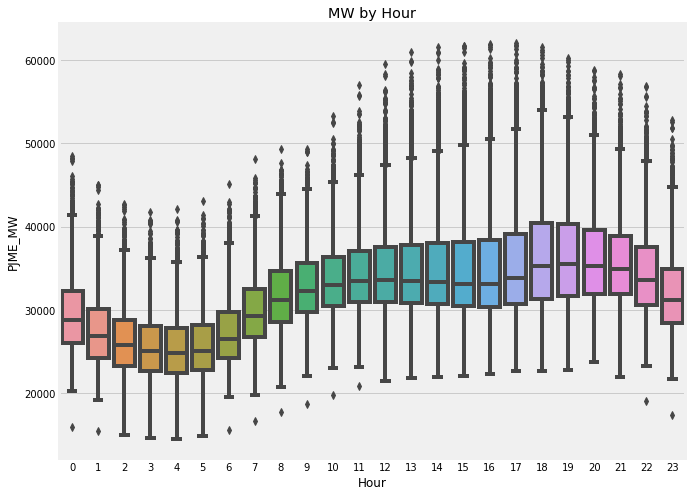

In [10]:
fig, ax=plt.subplots(figsize=(10,8))
sns.boxplot(data=df,x='Hour',y='PJME_MW')
ax.set_title('MW by Hour')

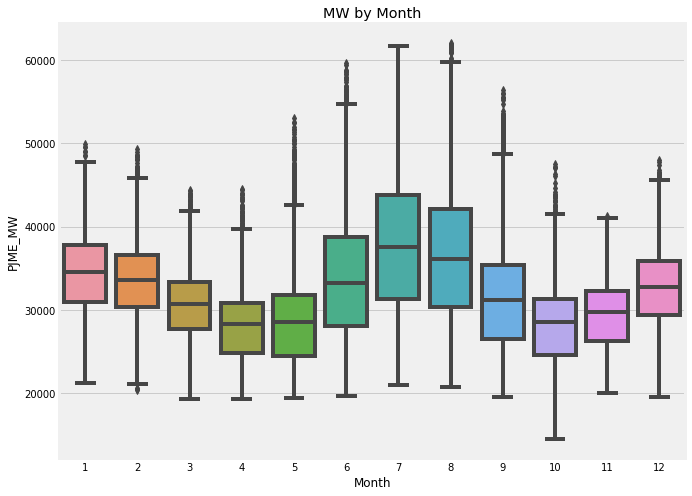

In [11]:
fig, ax=plt.subplots(figsize=(10,8))
sns.boxplot(data=df,x='Month',y='PJME_MW')
ax.set_title('MW by Month')
plt.show()

# Create model

In [12]:
reg=xgb.XGBRegressor(n_estimators=1000,early_stopping_rounds=50,learning_rate=0.01)
feature_creation(Train_df)
feature_creation(Test_df)
features=df.columns[1:]
target=df.columns[0]
X_train=Train_df[features]
Y_train=Train_df[target]
X_test=Test_df[features]
Y_test=Test_df[target]

reg.fit(X_train,Y_train,eval_set=[(X_train,Y_train),(X_test,Y_test)],verbose=True)

[0]	validation_0-rmse:32601.87826	validation_1-rmse:31654.28935
[1]	validation_0-rmse:32279.88735	validation_1-rmse:31332.60350
[2]	validation_0-rmse:31961.14360	validation_1-rmse:31014.27357
[3]	validation_0-rmse:31645.62525	validation_1-rmse:30699.10021
[4]	validation_0-rmse:31333.30788	validation_1-rmse:30385.92606
[5]	validation_0-rmse:31024.14316	validation_1-rmse:30075.82644
[6]	validation_0-rmse:30718.10796	validation_1-rmse:29769.05547
[7]	validation_0-rmse:30415.17979	validation_1-rmse:29465.13991
[8]	validation_0-rmse:30115.31200	validation_1-rmse:29164.62813
[9]	validation_0-rmse:29818.48171	validation_1-rmse:28866.85195
[10]	validation_0-rmse:29524.66621	validation_1-rmse:28571.74321
[11]	validation_0-rmse:29233.82326	validation_1-rmse:28280.36822
[12]	validation_0-rmse:28945.84624	validation_1-rmse:27991.28725
[13]	validation_0-rmse:28660.79477	validation_1-rmse:27705.25177
[14]	validation_0-rmse:28378.63482	validation_1-rmse:27422.93837
[15]	validation_0-rmse:28099.33236	

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [13]:
xgb.get_config()

{'use_rmm': False, 'verbosity': 1}

# Feature Importance

In [14]:
FI=pd.DataFrame(data=reg.feature_importances_, index=reg.feature_names_in_, columns=['importance'])
FI
#FI.sort_values ('importance').plot(kind='barh', title='Feature Importance')
#plt.show

,importance
Hour,0.448804
DayofWeek,0.158668
Quarter,0.033319
Month,0.228156
Year,0.022634
DayofYear,0.108419


In [15]:
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

# Forecast on Test

In [16]:
Test_df['prediction']=reg.predict(X_test)
Test_df

,PJME_MW,Hour,DayofWeek,Quarter,Month,Year,DayofYear,prediction
Datetime,,,,,,,,
2015-01-01 00:00:00,32802.0,0,3,1,1,2015,1,31861.591797
2015-01-01 01:00:00,31647.0,1,3,1,1,2015,1,30811.138672
2015-01-01 02:00:00,30755.0,2,3,1,1,2015,1,30460.460938
2015-01-01 03:00:00,30189.0,3,3,1,1,2015,1,30554.554688
2015-01-01 04:00:00,29890.0,4,3,1,1,2015,1,30554.554688
...,...,...,...,...,...,...,...,...
2018-08-02 20:00:00,44057.0,20,3,3,8,2018,214,40829.566406
2018-08-02 21:00:00,43256.0,21,3,3,8,2018,214,40358.277344
2018-08-02 22:00:00,41552.0,22,3,3,8,2018,214,39135.480469


<AxesSubplot:xlabel='Datetime'>

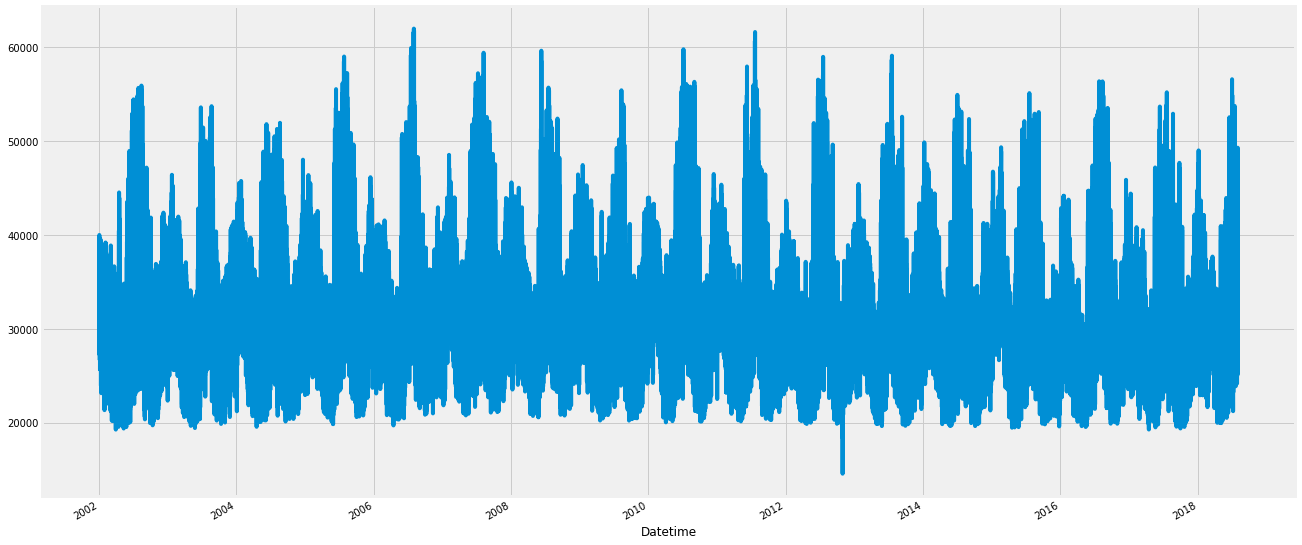

In [17]:
df=df.merge(Test_df['prediction'],how='left',left_index=True, right_index=True)
df['PJME_MW'].plot(figsize=[20,10])


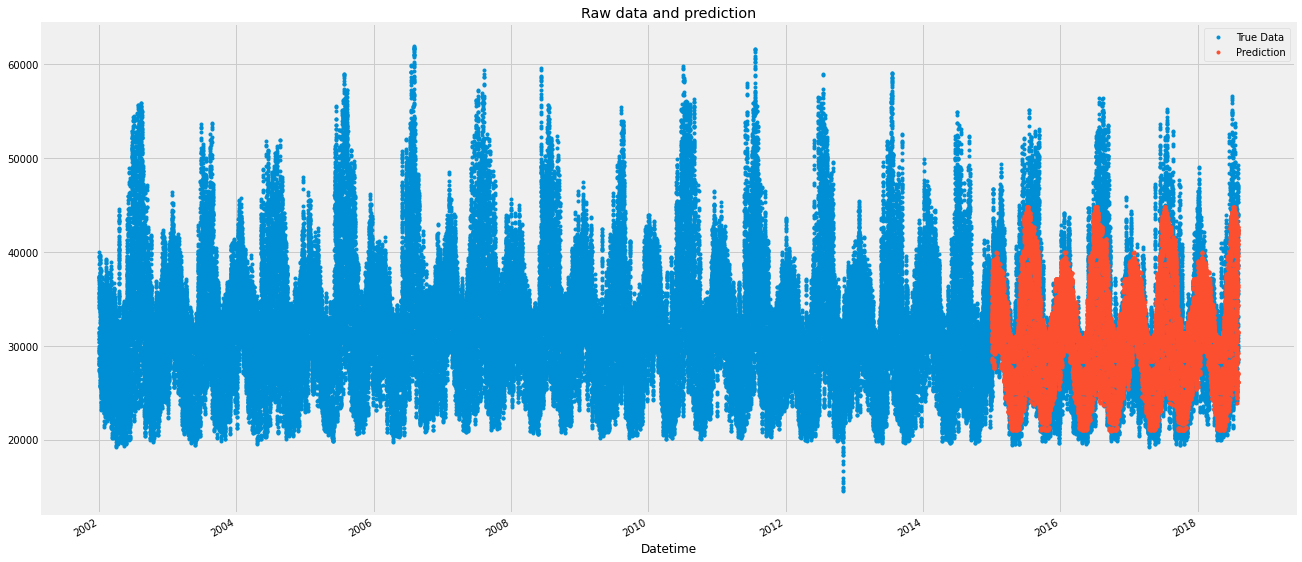

In [18]:
fig, ax=plt.subplots(figsize=(20,10))
df['PJME_MW'].plot(ax=ax,style='.')
df['prediction'].plot(ax=ax,style='.')
ax.set_title('Raw data and prediction')
plt.legend(['True Data','Prediction'])
plt.show()

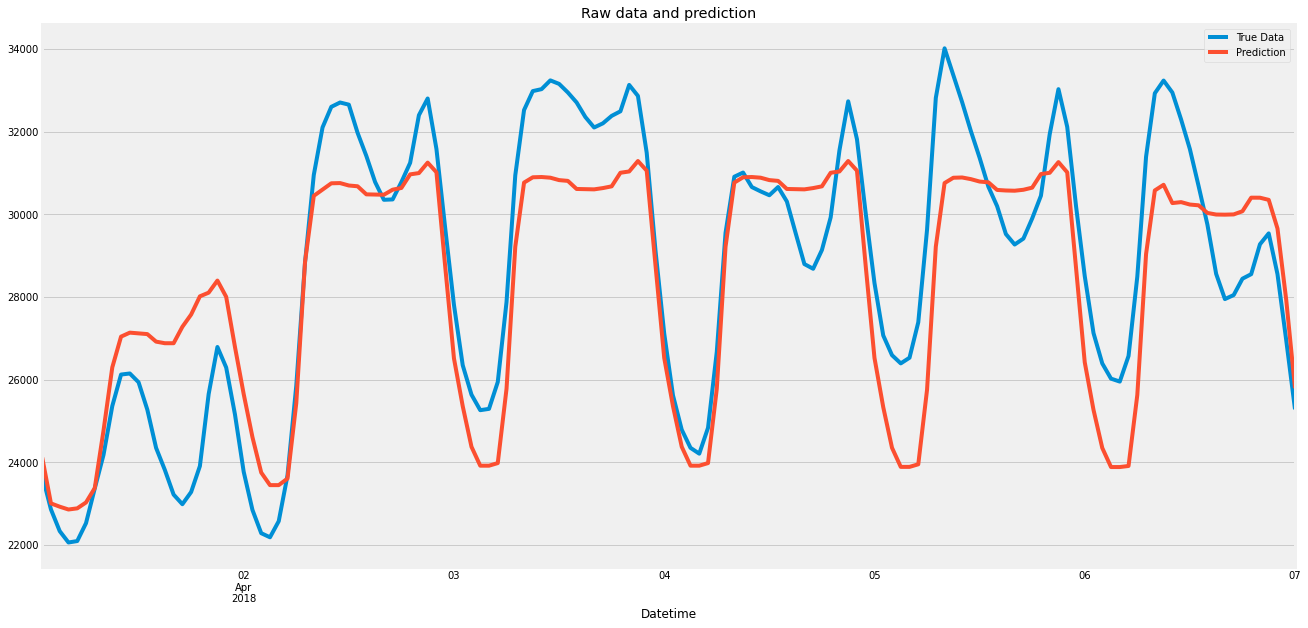

In [19]:
fig, ax=plt.subplots(figsize=(20,10))
df.loc[((df.index>'2018-04-01') &(df.index<='2018-04-07')),['PJME_MW']].plot(ax=ax,style='-')
df.loc[((df.index>'2018-04-01') &(df.index<='2018-04-07')),['prediction']].plot(ax=ax,style='-')


ax.set_title('Raw data and prediction')
plt.legend(['True Data','Prediction'])
plt.show()

In [20]:
score=np.sqrt(mean_squared_error(Test_df['PJME_MW'],Test_df['prediction']))
score

3715.9314164142415

In [21]:
Test_df

,PJME_MW,Hour,DayofWeek,Quarter,Month,Year,DayofYear,prediction
Datetime,,,,,,,,
2015-01-01 00:00:00,32802.0,0,3,1,1,2015,1,31861.591797
2015-01-01 01:00:00,31647.0,1,3,1,1,2015,1,30811.138672
2015-01-01 02:00:00,30755.0,2,3,1,1,2015,1,30460.460938
2015-01-01 03:00:00,30189.0,3,3,1,1,2015,1,30554.554688
2015-01-01 04:00:00,29890.0,4,3,1,1,2015,1,30554.554688
...,...,...,...,...,...,...,...,...
2018-08-02 20:00:00,44057.0,20,3,3,8,2018,214,40829.566406
2018-08-02 21:00:00,43256.0,21,3,3,8,2018,214,40358.277344
2018-08-02 22:00:00,41552.0,22,3,3,8,2018,214,39135.480469


# Calculate error
- worst and best days

In [22]:
np.abs(Test_df[target]-Test_df['prediction']).dtype

dtype('float64')

In [23]:
Test_df['error']=np.abs(Test_df[target]-Test_df['prediction'])
Test_df['date']=Test_df.index.date
#Test_df
Test_df.groupby('date').mean().sort_values('error',ascending=False)

,PJME_MW,Hour,DayofWeek,Quarter,Month,Year,DayofYear,prediction,error
date,,,,,,,,,
2016-08-13,45185.833333,11.5,5.0,3.0,8.0,2016.0,226.0,30608.623047,14577.210124
2016-08-14,44427.333333,11.5,6.0,3.0,8.0,2016.0,227.0,29954.861328,14472.472738
2016-09-10,40996.166667,11.5,5.0,3.0,9.0,2016.0,254.0,28501.285156,12494.880941
2016-08-12,45724.708333,11.5,4.0,3.0,8.0,2016.0,225.0,34199.289062,11525.418376
2016-09-09,43836.958333,11.5,4.0,3.0,9.0,2016.0,253.0,32467.318359,11369.640299
...,...,...,...,...,...,...,...,...,...
2016-12-08,32704.666667,11.5,3.0,4.0,12.0,2016.0,343.0,32913.398438,494.141764
2016-05-01,24503.625000,11.5,6.0,2.0,5.0,2016.0,122.0,24511.392578,465.372640
2015-03-10,31604.125000,11.5,1.0,1.0,3.0,2015.0,69.0,31883.400391,456.506510


# Next steps
- More robust cross validation
- Add more features(weather forecast, holidays)
- Outlier analysis
- Forecasting horizon 
- Lag features
- Predicting

<AxesSubplot:ylabel='Frequency'>

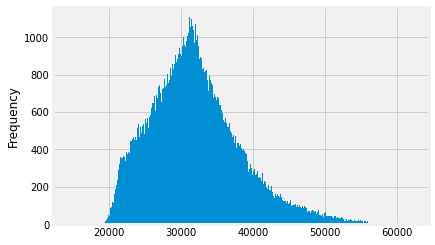

In [24]:
df['PJME_MW'].plot(kind='hist',bins=500)

<AxesSubplot:xlabel='Datetime'>

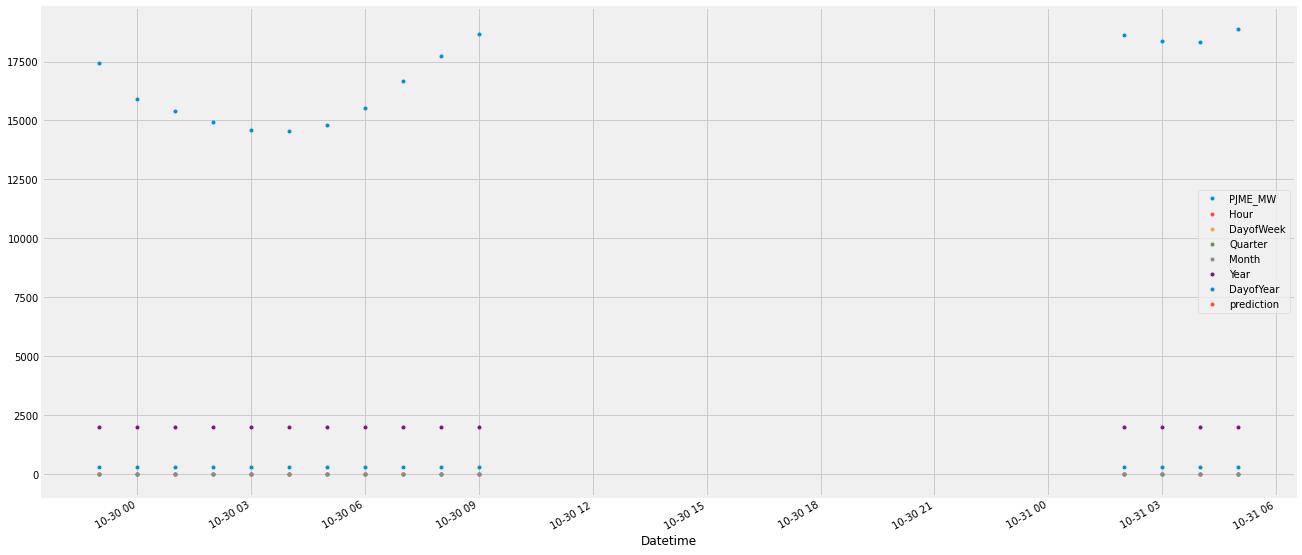

In [25]:
df.loc[df['PJME_MW']<19000].plot(figsize=(20,10),style='.')
#df.query('PJME_MW'<20000)

In [26]:
df=df.loc[df['PJME_MW']>19000]
df

,PJME_MW,Hour,DayofWeek,Quarter,Month,Year,DayofYear,prediction
Datetime,,,,,,,,
2002-01-01 01:00:00,30393.0,1,1,1,1,2002,1,NaN
2002-01-01 02:00:00,29265.0,2,1,1,1,2002,1,NaN
2002-01-01 03:00:00,28357.0,3,1,1,1,2002,1,NaN
2002-01-01 04:00:00,27899.0,4,1,1,1,2002,1,NaN
2002-01-01 05:00:00,28057.0,5,1,1,1,2002,1,NaN
...,...,...,...,...,...,...,...,...
2018-08-02 20:00:00,44057.0,20,3,3,8,2018,214,40829.566406
2018-08-02 21:00:00,43256.0,21,3,3,8,2018,214,40358.277344
2018-08-02 22:00:00,41552.0,22,3,3,8,2018,214,39135.480469


In [27]:
from sklearn.model_selection import TimeSeriesSplit

In [28]:
tss=TimeSeriesSplit(n_splits=5, test_size=24*365*1, gap=24)
df=df.sort_index()

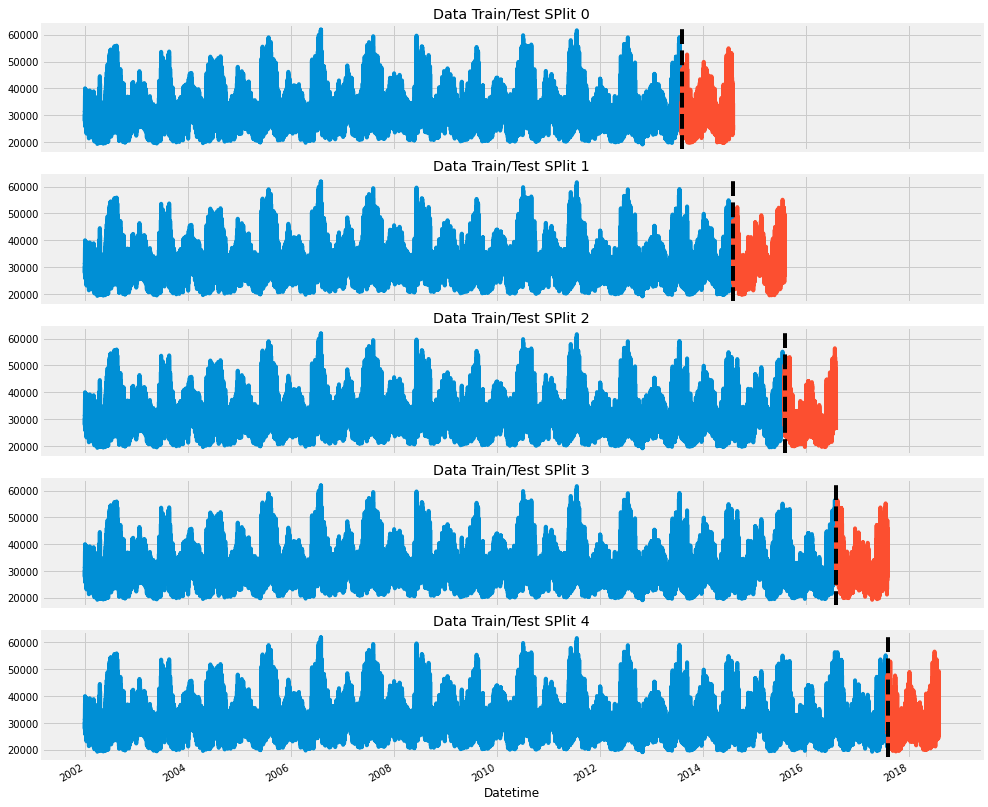

In [29]:
fig, axs =plt.subplots(5,1,figsize=(15,15), sharex=True)

fold=0
for train_idx, val_idx in tss.split(df):
    train=df.iloc[train_idx]
    test=df.iloc[val_idx]
    train['PJME_MW'].plot(ax=axs[fold],label='Training Set', title=f'Data Train/Test SPlit {fold}')
    test['PJME_MW'].plot(ax=axs[fold],label='Test Set')
    axs[fold].axvline(test.index.min(),color='black',ls='--')
    fold+=1
plt.show()

## 2. Lag Features
#### What was the target(x) in the past
#### X can't be longer than forcasting horizon

In [33]:
target_map=df['PJME_MW'].to_dict()
target_map

{Timestamp('2002-01-01 01:00:00'): 30393.0,
 Timestamp('2002-01-01 02:00:00'): 29265.0,
 Timestamp('2002-01-01 03:00:00'): 28357.0,
 Timestamp('2002-01-01 04:00:00'): 27899.0,
 Timestamp('2002-01-01 05:00:00'): 28057.0,
 Timestamp('2002-01-01 06:00:00'): 28654.0,
 Timestamp('2002-01-01 07:00:00'): 29308.0,
 Timestamp('2002-01-01 08:00:00'): 29595.0,
 Timestamp('2002-01-01 09:00:00'): 29943.0,
 Timestamp('2002-01-01 10:00:00'): 30692.0,
 Timestamp('2002-01-01 11:00:00'): 31395.0,
 Timestamp('2002-01-01 12:00:00'): 31496.0,
 Timestamp('2002-01-01 13:00:00'): 31031.0,
 Timestamp('2002-01-01 14:00:00'): 30360.0,
 Timestamp('2002-01-01 15:00:00'): 29798.0,
 Timestamp('2002-01-01 16:00:00'): 29720.0,
 Timestamp('2002-01-01 17:00:00'): 31271.0,
 Timestamp('2002-01-01 18:00:00'): 35103.0,
 Timestamp('2002-01-01 19:00:00'): 35732.0,
 Timestamp('2002-01-01 20:00:00'): 35639.0,
 Timestamp('2002-01-01 21:00:00'): 35285.0,
 Timestamp('2002-01-01 22:00:00'): 34007.0,
 Timestamp('2002-01-01 23:00:00'

In [42]:
#map function?
def add_lag_feature(df):
 df['Lag1']=(df.index-pd.Timedelta('364 days')).map(target_map)
 df['Lag2']=(df.index-pd.Timedelta('728 days')).map(target_map)
 df['Lag3']=(df.index-pd.Timedelta('1092 days')).map(target_map)
 return df

In [44]:
df=add_lag_feature(df)
df

,PJME_MW,Hour,DayofWeek,Quarter,Month,Year,DayofYear,prediction,Lag1,Lag2,Lag3
Datetime,,,,,,,,,,,
2002-01-01 01:00:00,30393.0,1,1,1,1,2002,1,NaN,NaN,NaN,NaN
2002-01-01 02:00:00,29265.0,2,1,1,1,2002,1,NaN,NaN,NaN,NaN
2002-01-01 03:00:00,28357.0,3,1,1,1,2002,1,NaN,NaN,NaN,NaN
2002-01-01 04:00:00,27899.0,4,1,1,1,2002,1,NaN,NaN,NaN,NaN
2002-01-01 05:00:00,28057.0,5,1,1,1,2002,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2018-08-02 20:00:00,44057.0,20,3,3,8,2018,214,40829.566406,42256.0,41485.0,38804.0
2018-08-02 21:00:00,43256.0,21,3,3,8,2018,214,40358.277344,41210.0,40249.0,38748.0
2018-08-02 22:00:00,41552.0,22,3,3,8,2018,214,39135.480469,39525.0,38698.0,37330.0


In [46]:
tss= TimeSeriesSplit(n_splits=5, test_size=24*365*1, gap=24)
df=df.sort_index()
fold=0
preds=[]
scores=[]
for train_idx,val_idx in tss.split(df):
    train=df.iloc[train_idx]
    test=df.iloc[val_idx]
    train=feature_creation(train)
    test=feature_creation(test)
    features=['DayofYear','Hour','DayofWeek','Quarter','Month','Year','Lag1','Lag2','Lag3']
    target='PJME_MW'
    X_train=train[features]
    Y_train=train[target]
    X_test=test[features]
    Y_test=test[target]

    reg=xgb.XGBRegressor(base_score=0.5,
                        booster='gbtree',
                        n_estimators=1000, 
                        early_stopping_rounds=50,
                        objective='reg:linear',max_depth=3,learning_rate=0.01)
    reg.fit(X_train, Y_train,eval_set=[(X_train,Y_train),(X_test, Y_test)],verbose=100)
    Y_pred=reg.predict(X_test)
    score=np.sqrt(mean_squared_error(Y_test,Y_pred))
    scores.append(score)
    

[11:14:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:32732.30381	validation_1-rmse:31956.18912


C:\Users\ZHANGL6\AppData\Local\Temp\1\ipykernel_12092\1819455558.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour']=df.index.hour
C:\Users\ZHANGL6\AppData\Local\Temp\1\ipykernel_12092\1819455558.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DayofWeek']=df.index.day_of_week
C:\Users\ZHANGL6\AppData\Local\Temp\1\ipykernel_12092\1819455558.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

[100]	validation_0-rmse:12532.08851	validation_1-rmse:11907.28743
[200]	validation_0-rmse:5743.63141	validation_1-rmse:5355.87526
[300]	validation_0-rmse:3866.68176	validation_1-rmse:3890.94882
[400]	validation_0-rmse:3429.68951	validation_1-rmse:3752.67972
[450]	validation_0-rmse:3355.70585	validation_1-rmse:3759.35636
[11:14:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\ZHANGL6\AppData\Local\Temp\1\ipykernel_12092\1819455558.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour']=df.index.hour
C:\Users\ZHANGL6\AppData\Local\Temp\1\ipykernel_12092\1819455558.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DayofWeek']=df.index.day_of_week
C:\Users\ZHANGL6\AppData\Local\Temp\1\ipykernel_12092\1819455558.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

[0]	validation_0-rmse:32671.76435	validation_1-rmse:32142.13257
[100]	validation_0-rmse:12513.14073	validation_1-rmse:12225.51268
[200]	validation_0-rmse:5755.09841	validation_1-rmse:5651.50008
[300]	validation_0-rmse:3906.44526	validation_1-rmse:3935.00246
[400]	validation_0-rmse:3477.03202	validation_1-rmse:3601.93393
[500]	validation_0-rmse:3355.81430	validation_1-rmse:3533.33574
[600]	validation_0-rmse:3298.51138	validation_1-rmse:3495.18668
[700]	validation_0-rmse:3258.56072	validation_1-rmse:3472.12865
[800]	validation_0-rmse:3222.37525	validation_1-rmse:3450.36558
[900]	validation_0-rmse:3192.19381	validation_1-rmse:3443.67348
[999]	validation_0-rmse:3170.11466	validation_1-rmse:3439.97974
[11:14:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:32630.96433	validation_1-rmse:31069.92885

C:\Users\ZHANGL6\AppData\Local\Temp\1\ipykernel_12092\1819455558.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour']=df.index.hour
C:\Users\ZHANGL6\AppData\Local\Temp\1\ipykernel_12092\1819455558.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DayofWeek']=df.index.day_of_week
C:\Users\ZHANGL6\AppData\Local\Temp\1\ipykernel_12092\1819455558.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

[100]	validation_0-rmse:12498.40033	validation_1-rmse:11131.14003
[200]	validation_0-rmse:5748.72832	validation_1-rmse:4806.60510
[300]	validation_0-rmse:3914.69095	validation_1-rmse:3547.91735
[400]	validation_0-rmse:3492.00123	validation_1-rmse:3491.40068
[408]	validation_0-rmse:3477.34542	validation_1-rmse:3498.68192
[11:15:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:32528.18290	validation_1-rmse:31474.49872


C:\Users\ZHANGL6\AppData\Local\Temp\1\ipykernel_12092\1819455558.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour']=df.index.hour
C:\Users\ZHANGL6\AppData\Local\Temp\1\ipykernel_12092\1819455558.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DayofWeek']=df.index.day_of_week
C:\Users\ZHANGL6\AppData\Local\Temp\1\ipykernel_12092\1819455558.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

[100]	validation_0-rmse:12461.66655	validation_1-rmse:12017.35006
[200]	validation_0-rmse:5736.29229	validation_1-rmse:5796.34923
[300]	validation_0-rmse:3912.33083	validation_1-rmse:4382.82502
[400]	validation_0-rmse:3495.43322	validation_1-rmse:4172.26243
[500]	validation_0-rmse:3380.91589	validation_1-rmse:4122.55699
[600]	validation_0-rmse:3322.34784	validation_1-rmse:4111.25192
[700]	validation_0-rmse:3281.81776	validation_1-rmse:4091.16211
[782]	validation_0-rmse:3255.55940	validation_1-rmse:4091.54114
[11:15:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:32461.75814	validation_1-rmse:31462.55758


C:\Users\ZHANGL6\AppData\Local\Temp\1\ipykernel_12092\1819455558.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour']=df.index.hour
C:\Users\ZHANGL6\AppData\Local\Temp\1\ipykernel_12092\1819455558.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DayofWeek']=df.index.day_of_week
C:\Users\ZHANGL6\AppData\Local\Temp\1\ipykernel_12092\1819455558.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

[100]	validation_0-rmse:12445.19180	validation_1-rmse:11957.66084
[200]	validation_0-rmse:5750.69630	validation_1-rmse:5611.22778
[300]	validation_0-rmse:3951.17781	validation_1-rmse:4149.75337
[400]	validation_0-rmse:3538.76364	validation_1-rmse:3995.61722
[440]	validation_0-rmse:3480.22753	validation_1-rmse:4005.18929


In [51]:
print(f'Score across folds {np.mean(scores):0.4f}')
print(f'Fold scores:{scores}')

Score across folds 3749.8536
Fold scores:[3752.67972535384, 3439.9797410456126, 3473.335331082484, 4089.393008070547, 3993.8801185144675]


## 3. Predict the future
- Retraining on all data
- To predict the futre we need an empty dataframe for future data ranges
- Run those dates through our feature creation code + lag creation

In [57]:
df=feature_creation(df)

features=[ 'DayofYear','Hour','DayofWeek','Quarter','Month','Year','Lag1','Lag2','Lag3']

target='PJME_MW'

X_all=df[features]
Y_all=df[target]

reg=xgb.XGBRegressor(
    base_score=0.5, 
    booster='gbtree',
    n_estimators=500,
    objective='reg:linear',
    max_depth=3,
    learning_rate=0.01)
reg.fit(
    X_all,Y_all,
    eval_set=[(X_all,Y_all)],
    verbose=100)

[11:54:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:32403.49915
[100]	validation_0-rmse:12426.33494
[200]	validation_0-rmse:5751.05496
[300]	validation_0-rmse:3969.60349
[400]	validation_0-rmse:3568.77505
[499]	validation_0-rmse:3454.87560


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto', ...)

In [65]:
# Create new dataframe
future = pd.date_range('2018-08-03','2019-08-01',freq='1h')
future_df=pd.DataFrame(index=future)
future_df['isFuture']=True
df['isFuture']=False
df_and_future=pd.concat([df,future_df])

df_and_future

,PJME_MW,Hour,DayofWeek,Quarter,Month,Year,DayofYear,prediction,Lag1,Lag2,Lag3,isFuture
2002-01-01 01:00:00,30393.0,1.0,1.0,1.0,1.0,2002.0,1.0,NaN,NaN,NaN,NaN,False
2002-01-01 02:00:00,29265.0,2.0,1.0,1.0,1.0,2002.0,1.0,NaN,NaN,NaN,NaN,False
2002-01-01 03:00:00,28357.0,3.0,1.0,1.0,1.0,2002.0,1.0,NaN,NaN,NaN,NaN,False
2002-01-01 04:00:00,27899.0,4.0,1.0,1.0,1.0,2002.0,1.0,NaN,NaN,NaN,NaN,False
2002-01-01 05:00:00,28057.0,5.0,1.0,1.0,1.0,2002.0,1.0,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2019-07-31 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2019-07-31 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2019-07-31 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [66]:
df_and_future=feature_creation(df_and_future)
df_and_future=add_lag_feature(df_and_future)
df_and_future

,PJME_MW,Hour,DayofWeek,Quarter,Month,Year,DayofYear,prediction,Lag1,Lag2,Lag3,isFuture
2002-01-01 01:00:00,30393.0,1,1,1,1,2002,1,NaN,NaN,NaN,NaN,False
2002-01-01 02:00:00,29265.0,2,1,1,1,2002,1,NaN,NaN,NaN,NaN,False
2002-01-01 03:00:00,28357.0,3,1,1,1,2002,1,NaN,NaN,NaN,NaN,False
2002-01-01 04:00:00,27899.0,4,1,1,1,2002,1,NaN,NaN,NaN,NaN,False
2002-01-01 05:00:00,28057.0,5,1,1,1,2002,1,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-31 20:00:00,NaN,20,2,3,7,2019,212,NaN,46912.0,39352.0,40243.0,True
2019-07-31 21:00:00,NaN,21,2,3,7,2019,212,NaN,45985.0,38699.0,39183.0,True
2019-07-31 22:00:00,NaN,22,2,3,7,2019,212,NaN,44094.0,37346.0,37759.0,True
2019-07-31 23:00:00,NaN,23,2,3,7,2019,212,NaN,40666.0,34555.0,34641.0,True


In [72]:
future_w_features=df_and_future.loc[df_and_future['isFuture']]
future_w_features

,PJME_MW,Hour,DayofWeek,Quarter,Month,Year,DayofYear,prediction,Lag1,Lag2,Lag3,isFuture
2018-08-03 00:00:00,NaN,0,4,3,8,2018,215,NaN,33539.0,32094.0,31695.0,True
2018-08-03 01:00:00,NaN,1,4,3,8,2018,215,NaN,30781.0,29503.0,29128.0,True
2018-08-03 02:00:00,NaN,2,4,3,8,2018,215,NaN,29015.0,27712.0,27373.0,True
2018-08-03 03:00:00,NaN,3,4,3,8,2018,215,NaN,27884.0,26535.0,26233.0,True
2018-08-03 04:00:00,NaN,4,4,3,8,2018,215,NaN,27223.0,25870.0,25643.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-31 20:00:00,NaN,20,2,3,7,2019,212,NaN,46912.0,39352.0,40243.0,True
2019-07-31 21:00:00,NaN,21,2,3,7,2019,212,NaN,45985.0,38699.0,39183.0,True
2019-07-31 22:00:00,NaN,22,2,3,7,2019,212,NaN,44094.0,37346.0,37759.0,True
2019-07-31 23:00:00,NaN,23,2,3,7,2019,212,NaN,40666.0,34555.0,34641.0,True


In [73]:
future_w_features['Prediction']=   reg.predict(future_w_features[features])

C:\Users\ZHANGL6\AppData\Local\Temp\1\ipykernel_12092\2591735078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future_w_features['Prediction']=   reg.predict(future_w_features[features])


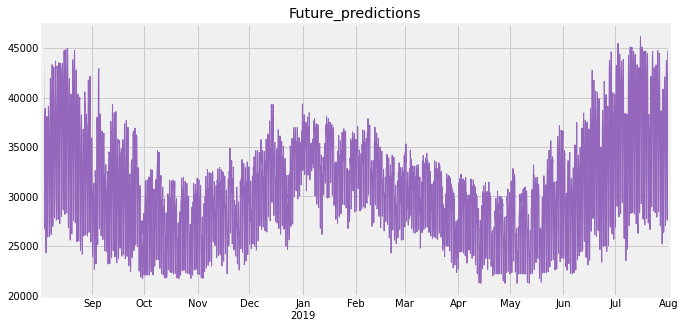

In [80]:
future_w_features['Prediction'].plot(figsize=(10,5), 
 color=color_pal[4],
 ms=1,
 lw=1,
 title='Future_predictions')
 
plt.show()



## Save model

In [81]:
reg.save_model('model.json')

In [82]:
!ls -lh

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
reg_new=xgb.XGBRFRegressor()
reg_new.load_model('model.json')
future_w_features['Prediction']=   reg.predict(future_w_features[features])

In [ ]:
future_w_features['Prediction'].plot(figsize=(10,5), 
 color=color_pal[4],
 ms=1,
 lw=1,
 title='Future_predictions')
 
plt.show()